Automobile Insurance Fraud

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the file and print the first few lines using head function
df=pd.read_csv('Auto Insurance Fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape
#shape tells us the number of rows and columns; here there are 1000 rows and 40 columns

(1000, 40)

In [4]:
df.dtypes
#dtypes tells us about the datatypes of the dataset column wise.

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.info()
#info fucntion tells us the concise summary of the dataframe; it tells us the datatypes and the count of non null values
#it also shows that there are 2 float columns, 17  integer columns and  21 string/object columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df['fraud_reported'].value_counts()
#here fraud reported is the target variable and it has two values Yes or No; using count function we have counted the number of yes and no values

N    753
Y    247
Name: fraud_reported, dtype: int64

In [7]:
df.columns
#it tells us the name of the columns in the dataset

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.isnull().sum()
#lets check the presence of null values;

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

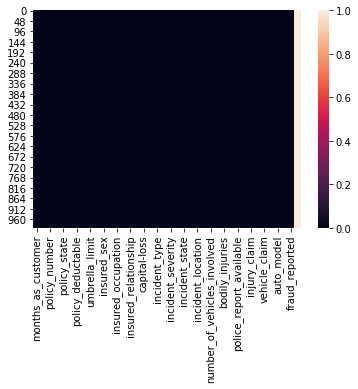

In [8]:
sns.heatmap(df.isnull())
#we have plotted the null values using heatmap; it is clear that there are no null values

In [10]:
df.drop(['_c39'],axis=1,inplace=True)
#lets drop the _c39 column as it is irrelevant 

In [11]:
df['policy_number'].nunique()
#check the number of uniwue values 

1000

In [12]:
#lets drop policy number column as it is irrelevant 
df.drop(['policy_number'],axis=1,inplace=True)

Policy bind date column analysis

In [13]:
df['policy_bind_date'].head(2)

0    17-10-2014
1    27-06-2006
Name: policy_bind_date, dtype: object

In [14]:
#changing the date format 
df['policy_bind_day']=df['policy_bind_date'].str.split('-').str[0].astype(int)
df['policy_bind_month']=df['policy_bind_date'].str.split('-').str[1].astype(int)
df['policy_bind_year']=df['policy_bind_date'].str.split('-').str[2].astype(int)

In [15]:
#droppping the policy bind date column
df.drop(['policy_bind_date'],axis=1,inplace=True)

Policy state column analysis

In [16]:
df['policy_state'].value_counts()
#count the number of policy states - OH,IL and IN each

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])

Policy csl column analysis

In [18]:
#count the number of values in policy csl
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [19]:
df['policy_csl']=le.fit_transform(df['policy_csl'])

insured_Sex column analysis

In [20]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [21]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

insured_education_level column analysis

In [22]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [23]:

df['insured_education_level']=le.fit_transform(df['insured_education_level'])

insured_occupation column analysis

In [24]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [25]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

insured_hobbies column analysis

In [26]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [32]:
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])

insured_relationship column analysis

In [33]:
df['insured_relationship'].value_counts()


3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

In [34]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])


incident_date column analysis

In [35]:
df['incident_date'].head(2)
#check the incident date

0    25-01-2015
1    21-01-2015
Name: incident_date, dtype: object

In [36]:
#change date format 
df['incident_day']=df['incident_date'].str.split('-').str[0].astype(int)
df['incident_month']=df['incident_date'].str.split('-').str[1].astype(int)
df['incident_year']=df['incident_date'].str.split('-').str[2].astype(int)

In [37]:
df.drop(['incident_date'],axis=1,inplace=True)
#drop incident date column

incident_type column analysis

In [38]:
df['incident_type'].value_counts()


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [39]:
df['incident_type']=le.fit_transform(df['incident_type'])

collision_type column analysis

In [40]:
df['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [41]:
df['collision_type'].replace(['?'],['None'],inplace=True)
#replacing ? and None 

In [42]:
df['collision_type']=le.fit_transform(df['collision_type'])

incident_severity column analysis

In [43]:
df['incident_severity'].value_counts()
 #incident severity column contains 4 types of values ; here it counts each of the values#

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [44]:
df['incident_severity']=le.fit_transform(df['incident_severity'])

authorities_contacted columns analysis

In [45]:
df['authorities_contacted'].value_counts()
#authorities contacted column contains 5 types of values ; here it counts each of the values#

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [46]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

incident_state columns analysis

In [47]:
df['incident_state'].value_counts()
#counting incident state variables - NY, SC, WV, VA, PA, OH

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [48]:
df['incident_state']=le.fit_transform(df['incident_state'])

incident_city column analysis

In [49]:
df['incident_city'].value_counts()
#counting incident city variables - Springfield, Arlington, Columbus, Northbend, Hillsdale,Riverwood and Northbrook            

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [50]:
df['incident_city']=le.fit_transform(df['incident_city'])

incident_location column analysis

In [51]:
df['incident_location'].value_counts()

4983 MLK Ridge      1
7773 Tree Hwy       1
5914 Oak Ave        1
7238 2nd St         1
2862 Tree Ridge     1
                   ..
9358 Texas Ridge    1
7002 Oak Hwy        1
2063 Weaver St      1
8100 3rd Ave        1
9935 4th Drive      1
Name: incident_location, Length: 1000, dtype: int64

In [52]:
df['incident_location'].head()

0       9935 4th Drive
1         6608 MLK Hwy
2    7121 Francis Lane
3     6956 Maple Drive
4         3041 3rd Ave
Name: incident_location, dtype: object

In [53]:
df.drop(['incident_location'],axis=1,inplace=True)

property_damage column analysis

In [54]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [55]:
df['property_damage'].replace(['?'],['None'],inplace=True)
df['property_damage']=le.fit_transform(df['property_damage'])

police_report_available column analysis

In [56]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [57]:
df['police_report_available'].replace(['?'],['None'],inplace=True)

In [58]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

auto_make column analysis

In [59]:
df['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [60]:
df['auto_make']=le.fit_transform(df['auto_make'])

auto_model column analysis

In [61]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
E400              27
95                27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
ML350             20
Corolla           20
TL                20
CRV               20
Impreza           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [62]:
df['auto_model']=le.fit_transform(df['auto_model'])

fraud_reported column analysis

In [63]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [64]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int32  
 9   insured_education_level      1000 non-null   int32  
 10  insured_occupation           1000 non-null   int32  
 11  insured_hobbies              1000 non-null   int64  
 12  insured_relationship         1000 non-null   int64  
 13  capital-gains      

In [66]:
df.shape
#check the number of rows and columns

(1000, 41)

Fraud_reported column 

In [67]:
df['fraud_reported'].value_counts()
#count the values 0 and 1 (which shows no and yes respectively) in the fraud reported column which is our target

0    753
1    247
Name: fraud_reported, dtype: int64

In [68]:
from sklearn.utils import resample
df_0 = df[df['fraud_reported']==0]
df_1 = df[df['fraud_reported']==1]

df_1_ups = resample(df_1,replace=True,n_samples=753,random_state=123) 
 
df_new = pd.concat([df_0, df_1_ups])

In [69]:
df_new.shape

(1506, 41)

In [70]:
df_new['fraud_reported'].value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

Splitting the data 

In [71]:
x=df_new.drop(['fraud_reported'],axis=1)
x.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,23100,4,30,2007,6,9,2000,22,2,2015
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,4550,0,31,2009,6,6,2014,17,2,2015
6,137,34,1,1,1000,1333.35,0,441716,1,6,...,50050,9,29,2012,4,6,2000,13,1,2015
7,165,37,0,0,1000,1137.03,0,603195,1,0,...,32830,1,5,2015,3,2,1990,27,2,2015
8,27,33,0,0,500,1442.99,0,601734,0,6,...,22160,12,9,2012,5,2,1997,30,1,2015


In [72]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [73]:
y=df_new['fraud_reported']
y.head()

2    0
4    0
6    0
7    0
8    0
Name: fraud_reported, dtype: int32

In [74]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=56,stratify=y)

In [75]:
print(x_train.shape,x_test.shape)

(1054, 40) (452, 40)


In [76]:
print(y_train.shape,y_test.shape)


(1054,) (452,)


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

In [78]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=56)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=200,random_state=56)
GBC=GradientBoostingClassifier(n_estimators=200,random_state=56)
ABC=AdaBoostClassifier(random_state=56)
ETC=ExtraTreesClassifier(random_state=56)

In [79]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.6592920353982301


Cross_Val_Score =  0.705916114790287


roc_auc_score =  0.6592920353982301


classification_report
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       226
           1       0.63      0.77      0.69       226

    accuracy                           0.66       452
   macro avg       0.67      0.66      0.66       452
weighted avg       0.67      0.66      0.66       452



[[124 102]
 [ 52 174]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf'

AxesSubplot(0.125,0.808774;0.62x0.0712264)





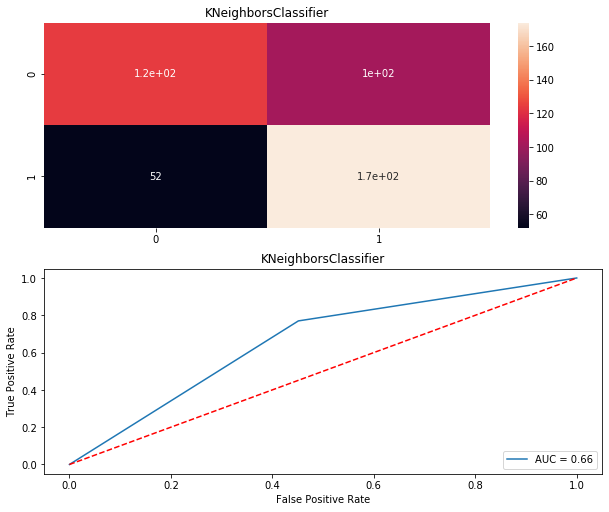

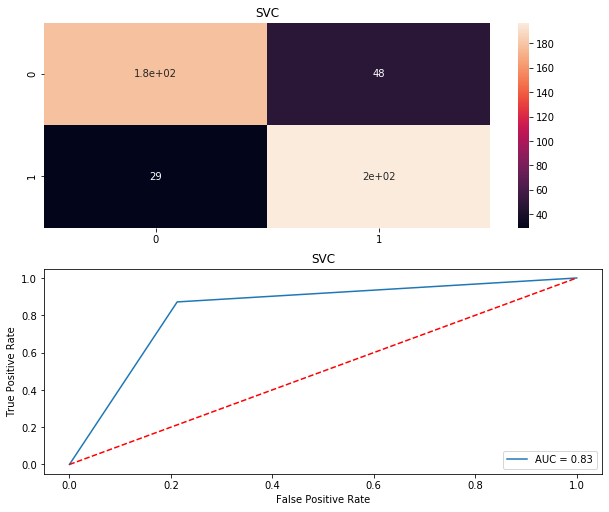

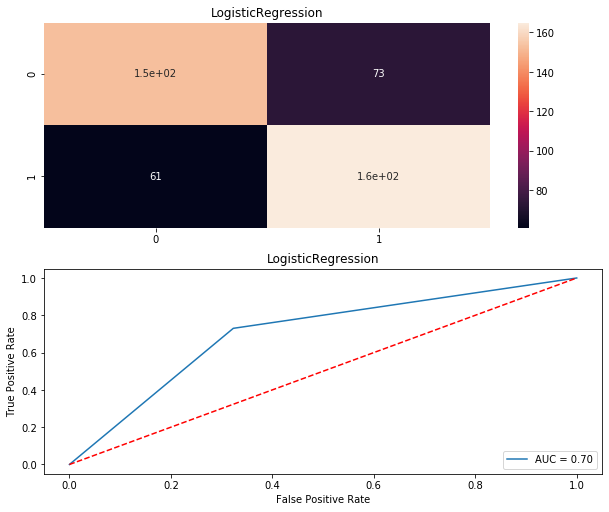

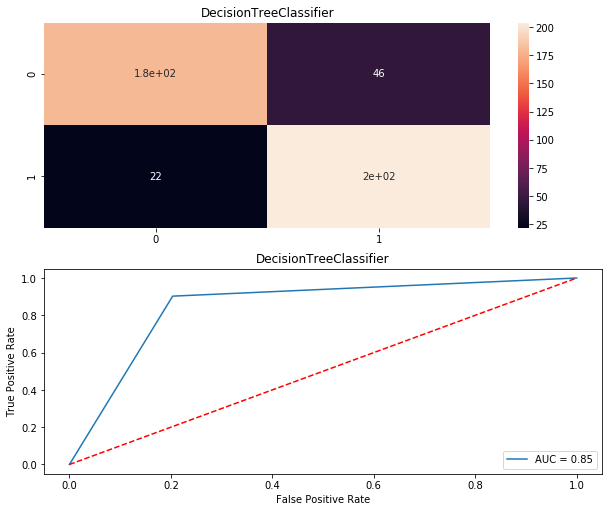

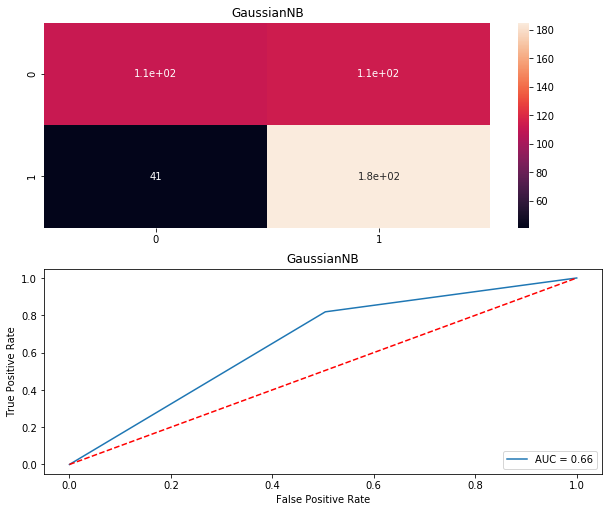

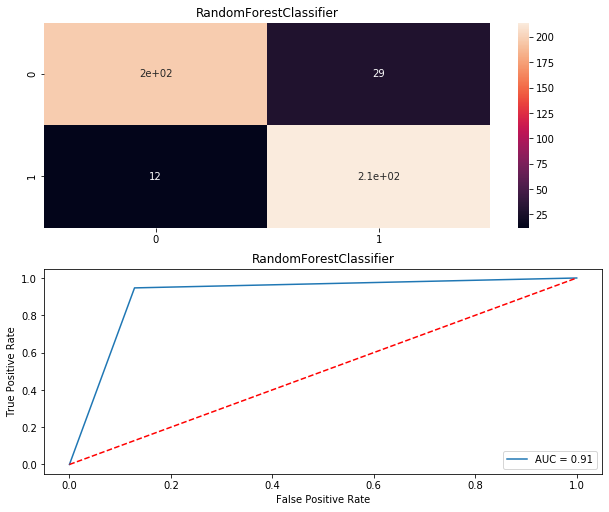

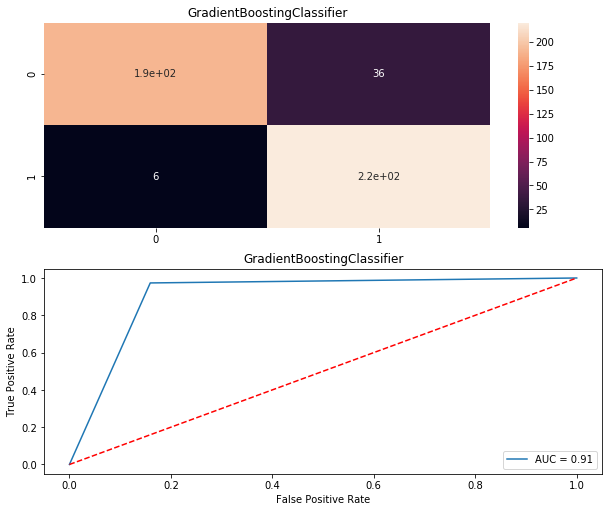

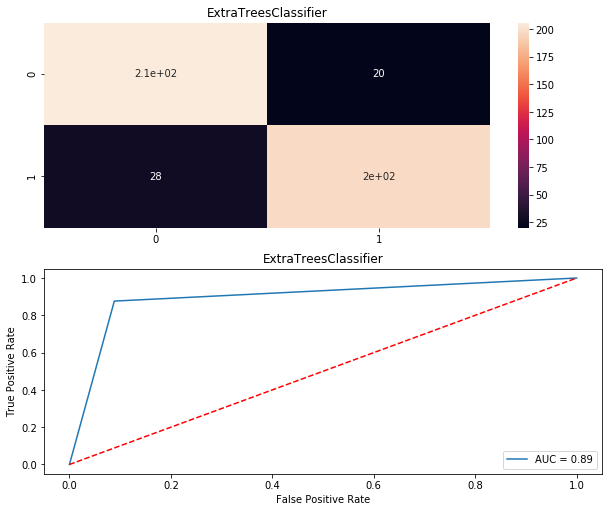

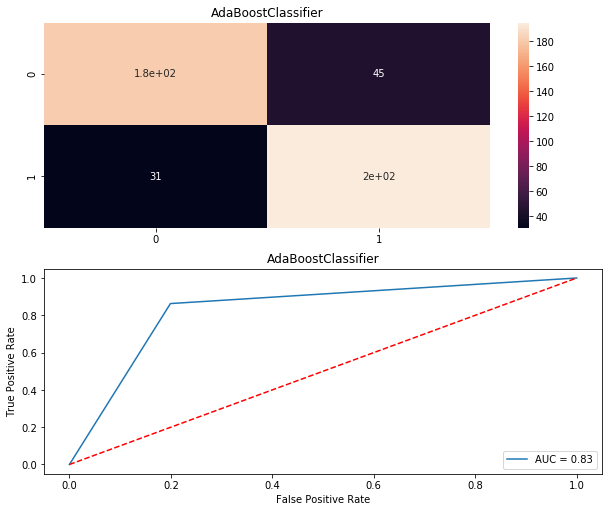

In [81]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [82]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,65.929204,70.591611,65.929204
1,SVC,82.964602,85.796468,82.964602
2,LogisticRegression,70.353982,72.581898,70.353982
3,DecisionTreeClassifier,84.955752,91.105960,84.955752
4,GaussianNB,65.707965,69.466667,65.707965
5,RandomForestClassifier,90.929204,92.566004,90.929204
6,GradientBoostingClassifier,90.707965,92.566887,90.707965
7,ExtraTreesClassifier,89.380531,94.691832,89.380531
8,AdaBoostClassifier,83.185841,84.334658,83.185841


I choose RandomForestClassifier as my final model because it perform very well on our dataset and also has good accuracy_score and Cross_val_score

Accuracy_score = 90.929204

Cross_val_score = 92.566004

Roc_auc_curve = 90.929204

In [83]:
#save the model
from sklearn.externals import joblib
joblib.dump(RFC,"model_Insurance_fraud.pkl")

['model_Insurance_fraud.pkl']